#### Customer Churn Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings 
warnings. filterwarnings('ignore')

In [3]:
df=pd.read_csv('C:\\Users\\Admin\\Downloads\\Telecom_customer_churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


- We have 7043 rows and 21 columns in data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['TotalCharges'] = le.fit_transform(df['TotalCharges'])

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- We don't have any null values in data

In [9]:
# printing all data type and their unique values
for column in df.columns:
    if df[column].dtype==object:
        print(df[column].value_counts())

1767-CJKBA    1
0386-CWRGM    1
3518-PZXZQ    1
2082-OJVTK    1
7595-EHCDL    1
             ..
4548-SDBKE    1
5968-VXZLG    1
6861-XWTWQ    1
2952-QAYZF    1
4636-TVXVG    1
Name: customerID, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: in

In [10]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [11]:
# dropping useless columns 
df.drop('customerID',axis=1,inplace=True)

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,3257.794122
std,0.368612,24.559481,30.090047,1888.693496
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,1609.000000
50%,0.000000,29.000000,70.350000,3249.000000
75%,0.000000,55.000000,89.850000,4901.500000
max,1.000000,72.000000,118.750000,6530.000000


<AxesSubplot:xlabel='Churn', ylabel='count'>

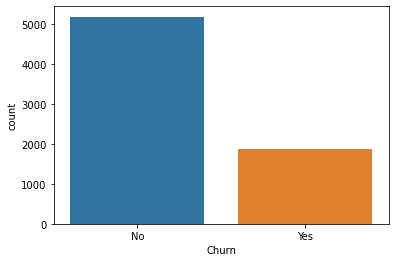

In [13]:
sns.countplot(df['Churn'])

- We can notice that data is imbalanced.

# EDA

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

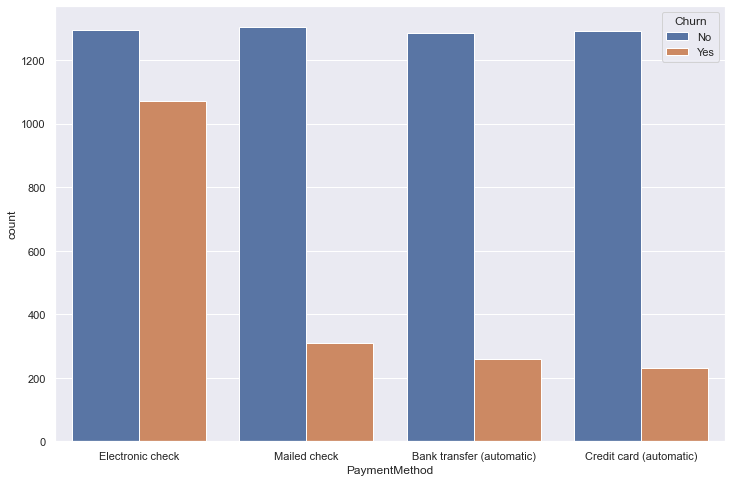

In [14]:
plt.figure(figsize=(12, 8))
sns. set(color_codes=True)
sns.countplot(x='PaymentMethod',hue='Churn',data= df )

- Here We can notice Churn rate is very high in those are having Electronic check of payment method and Its almost equal in other PaymentMethods

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

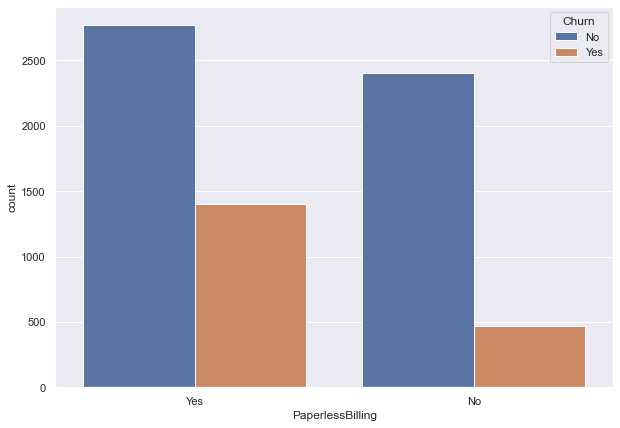

In [15]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='PaperlessBilling',hue='Churn',data= df )

<AxesSubplot:xlabel='Contract', ylabel='count'>

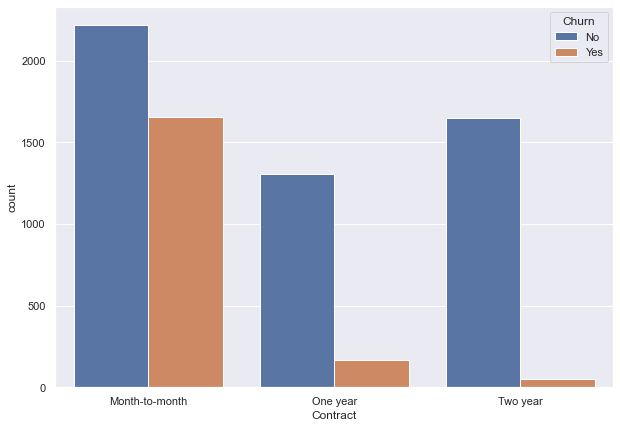

In [16]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='Contract',hue='Churn',data= df )

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

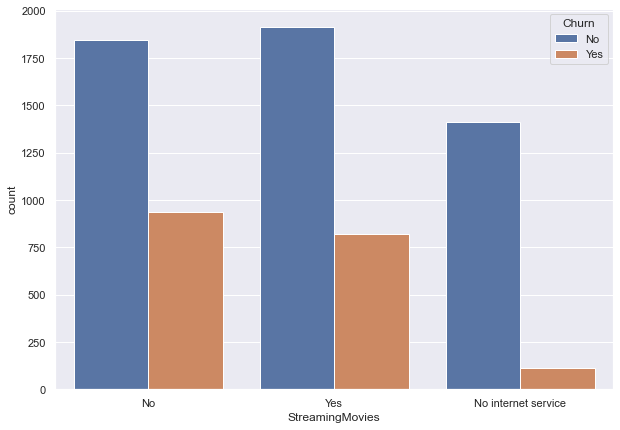

In [17]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='StreamingMovies',hue='Churn',data= df )

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

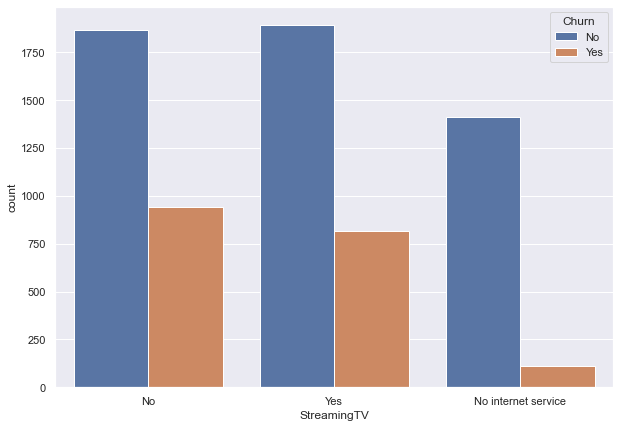

In [18]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='StreamingTV',hue='Churn',data= df )

- For StreamingTV, Churn Rate is little high than those not having the service of StreamingTV and internet service.

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

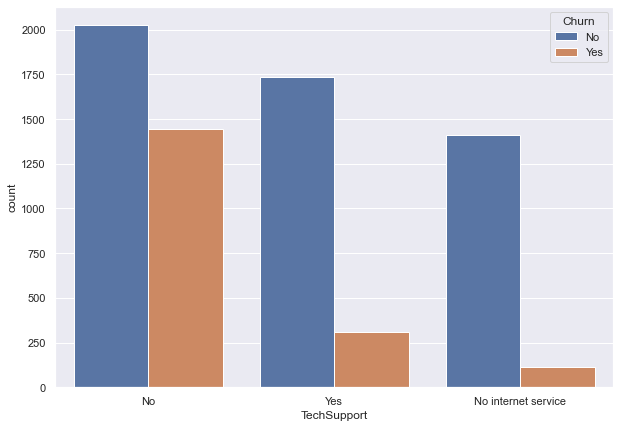

In [19]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='TechSupport',hue='Churn',data= df )

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

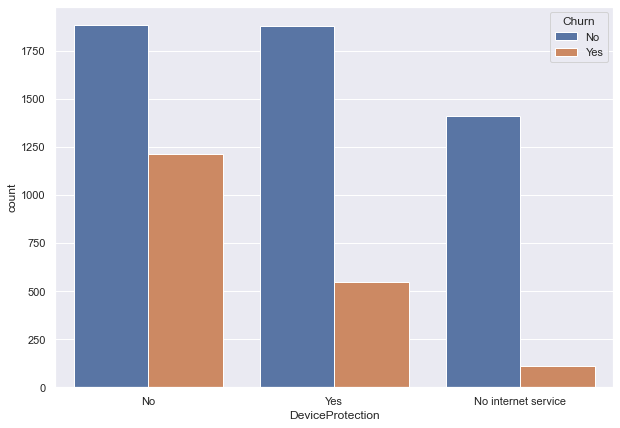

In [20]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='DeviceProtection',hue='Churn',data= df )

- Here we also notice Churn is high no Device Protection

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

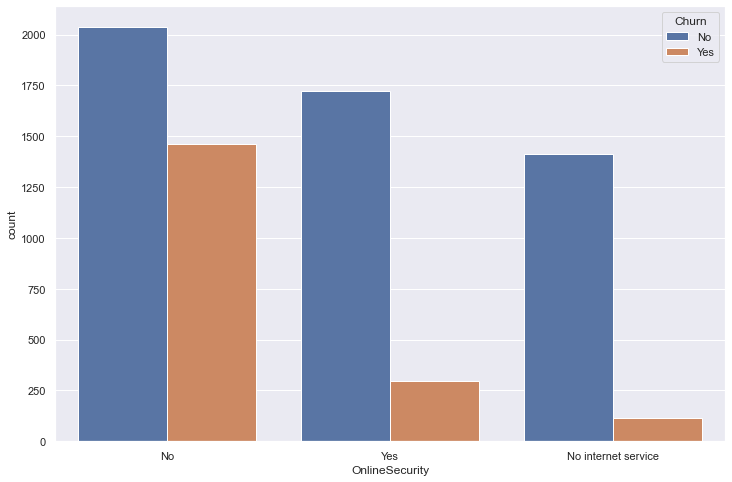

In [21]:
plt.figure(figsize=(12, 8))
sns. set(color_codes=True)
sns.countplot(x='OnlineSecurity',hue='Churn',data= df )

- Churn Rate is low for Online Security and no internet service

<AxesSubplot:xlabel='InternetService', ylabel='count'>

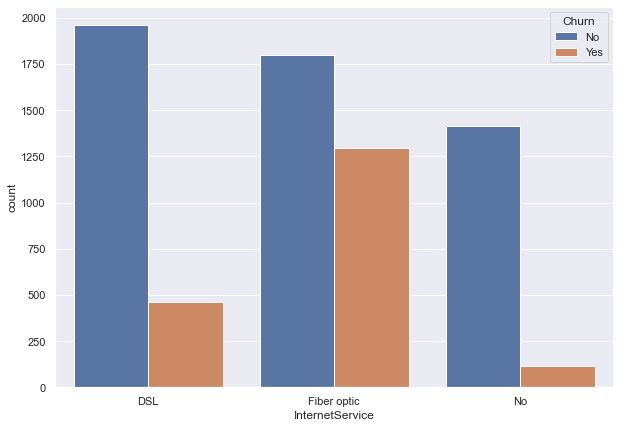

In [22]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='InternetService',hue='Churn',data= df )

In [ ]:
- Churn is very high in for Fiber Optic Internet service
- Churn is very low where for No Internet service

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

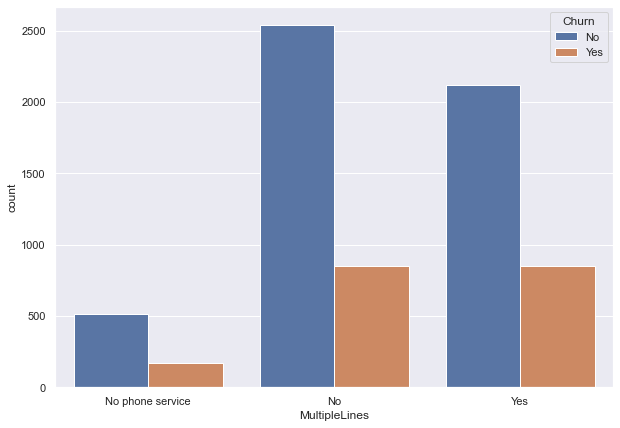

In [23]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='MultipleLines',hue='Churn',data= df )

- Churn Percentage is high for multiple lines 

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

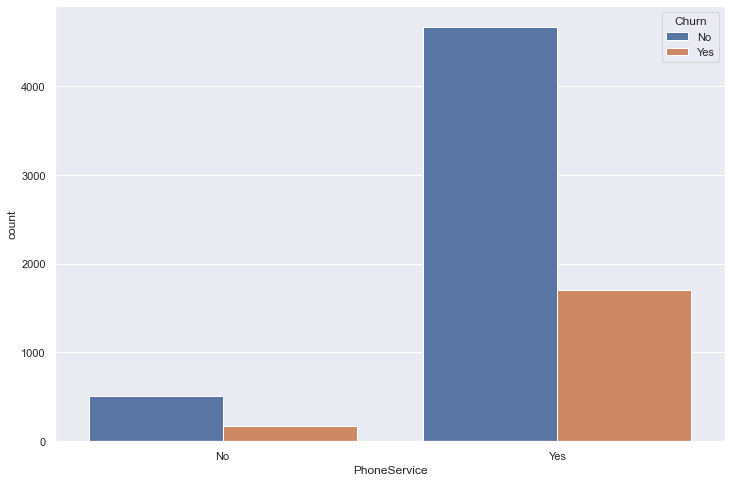

In [24]:
plt.figure(figsize=(12, 8))
sns. set(color_codes=True)
sns.countplot(x='PhoneService',hue='Churn',data= df )

- We can see most the people having PhoneService
- Churn is also high with people having PhoneService

<AxesSubplot:xlabel='tenure', ylabel='count'>

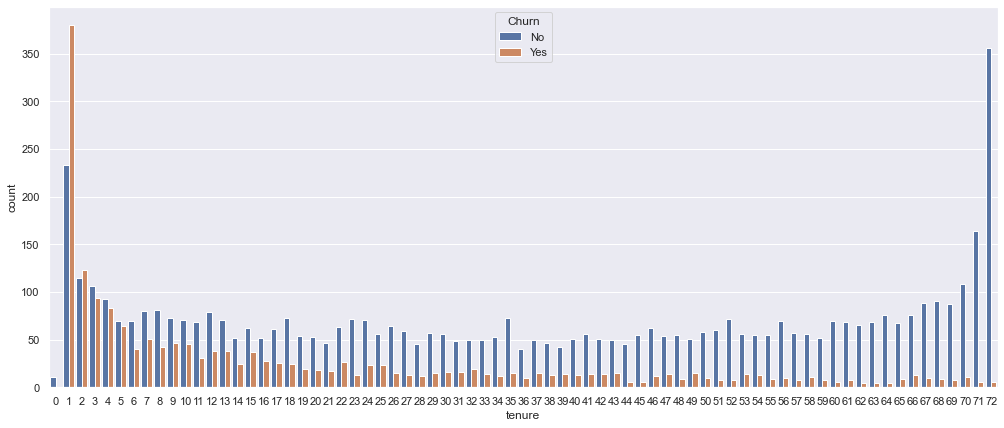

In [25]:
plt.figure(figsize=(17, 7))
sns. set(color_codes=True)
sns.countplot(x='tenure',hue='Churn',data= df )

Inferences:
- Churn is high where tenure is less 
- When tenure is 1 churn rate is very high
- Churn seems to ne high where tenure is 1 to 6 
- When tenure is increasing Churn is decreasing

<AxesSubplot:xlabel='Dependents', ylabel='count'>

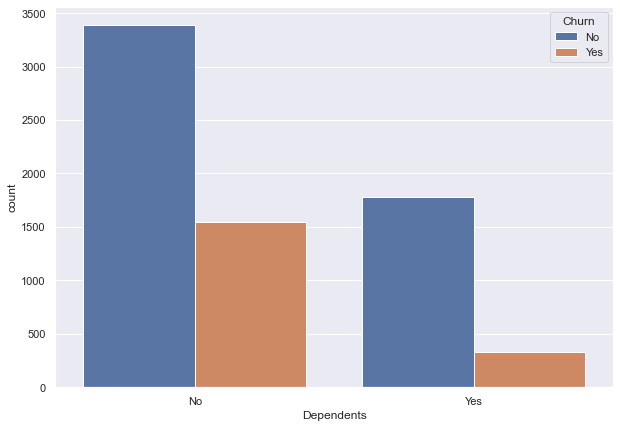

In [26]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='Dependents',hue='Churn',data= df )

<AxesSubplot:xlabel='Partner', ylabel='count'>

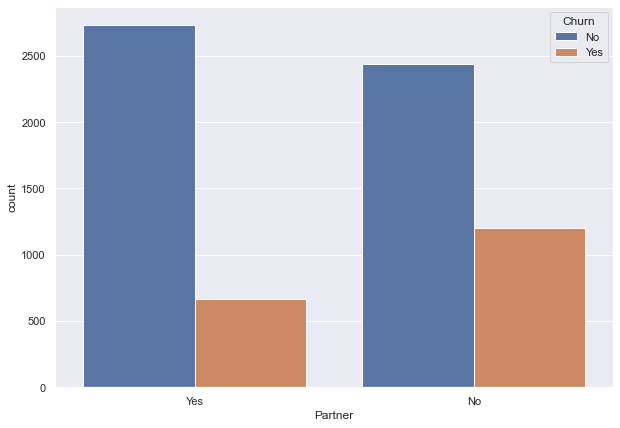

In [27]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='Partner',hue='Churn',data= df )

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

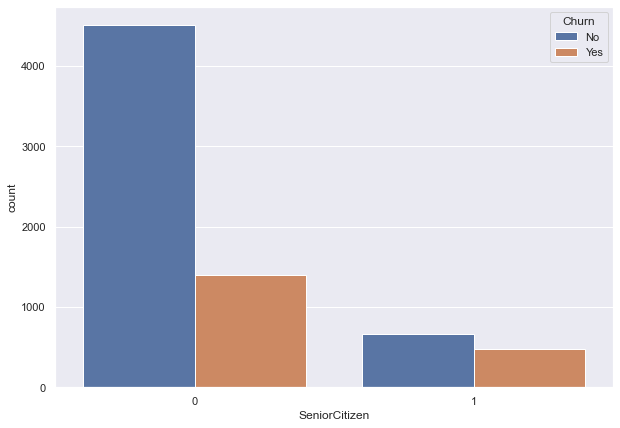

In [28]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='SeniorCitizen',hue='Churn',data= df )

- Churn is less in SeniorCitizen

<AxesSubplot:xlabel='gender', ylabel='count'>

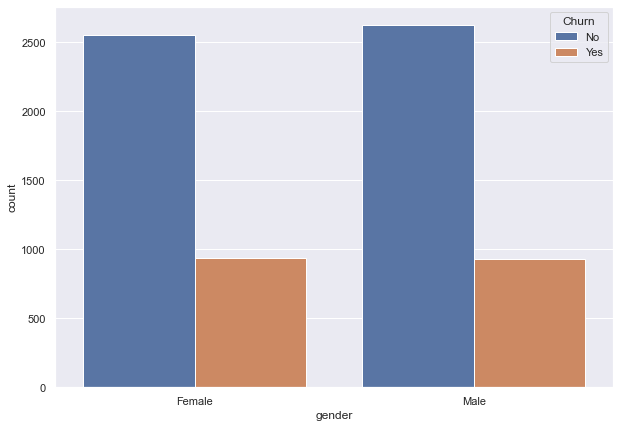

In [29]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='gender', hue='Churn',data= df )

- Churn is almost same in all gender, male and female

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

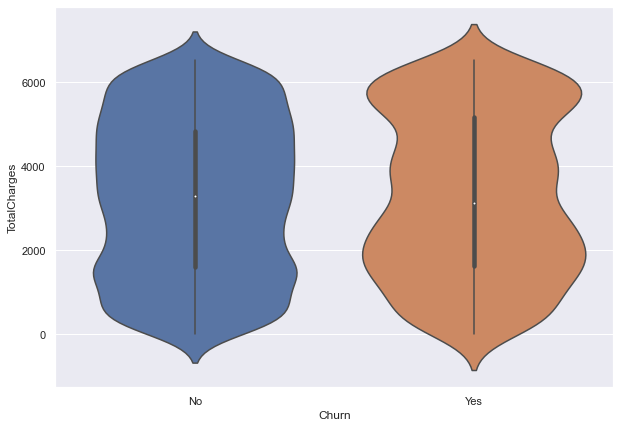

In [30]:
plt.figure(figsize=(10, 7))
sns.violinplot(x='Churn', y='TotalCharges',data=df )

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

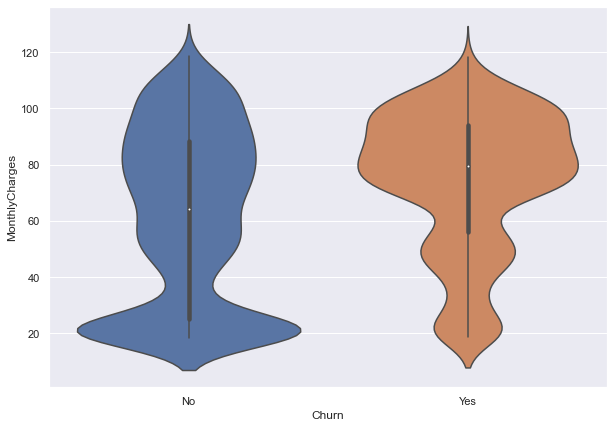

In [31]:
plt.figure(figsize=(10, 7))
sns.violinplot(x='Churn', y='MonthlyCharges',data=df )

## Using LabelEncoder for convering categorical to numerical

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
#Encoding object columns into Numeric Values in df_train
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categ_data = df.select_dtypes(exclude=['int64', 'float','int32'])
for val in categ_data:
    df[val]=le.fit_transform(df[val].astype(str))

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


- All columns are converted into numerical now

In [36]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


# Skewness handling


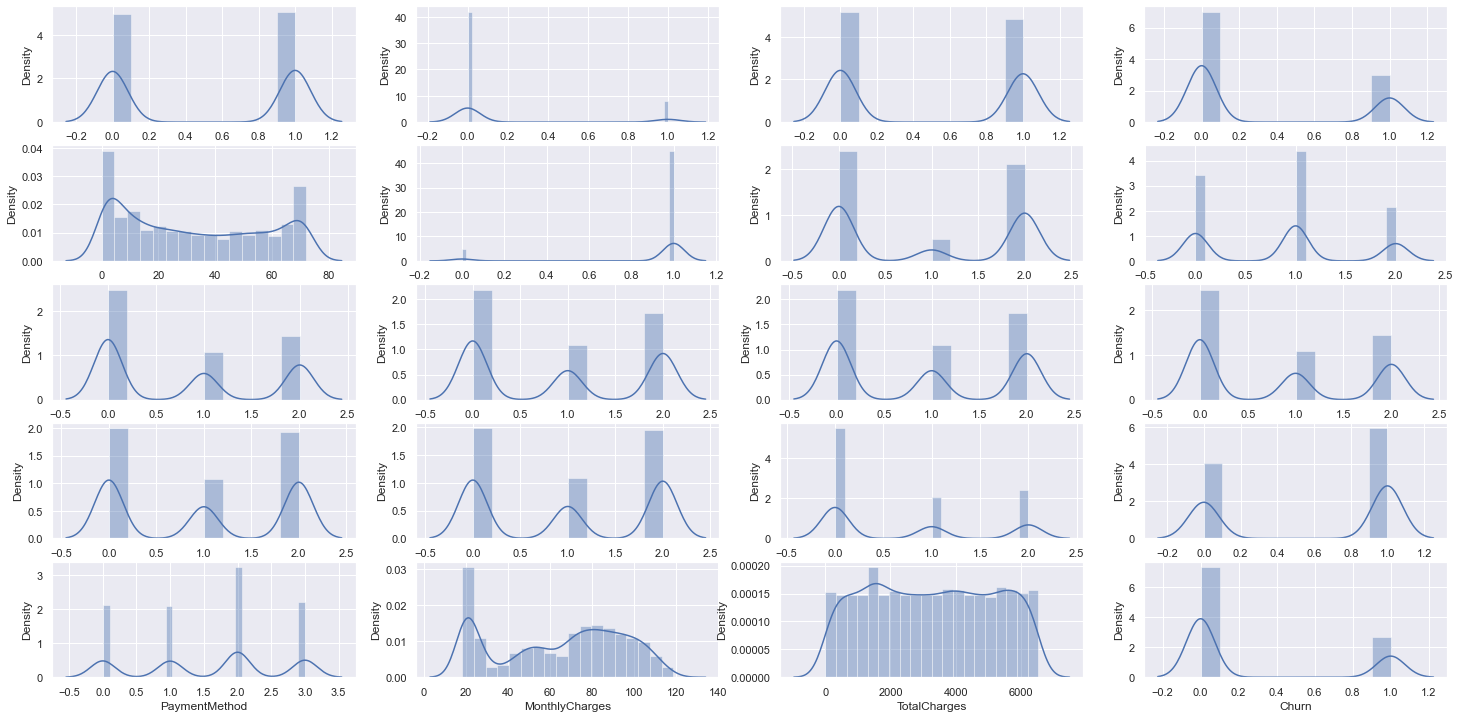

In [38]:
plt.figure(figsize=(25,20))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='b')

In [39]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

In [42]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

- We can observe skewness is removed from all numerical columns

## Outliers Handling

<AxesSubplot:xlabel='MonthlyCharges'>

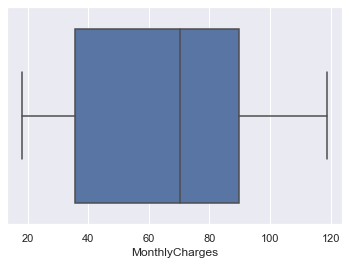

In [43]:
sns.boxplot(df['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges'>

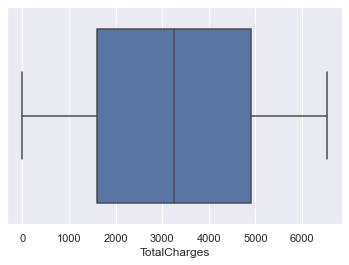

In [44]:
sns.boxplot(df['TotalCharges'])

- We don't see any outliers in numerical columns

# We are dealing with skenwness and outliers in category features 

# Dividing data into X and Y

In [45]:
x=df.drop(['Churn'],axis=1)
y=df['Churn']


In [46]:
x.shape

(7043, 19)

In [47]:
y.shape

(7043,)

### Scaling X values


In [48]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [49]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
dtype: int64

In [50]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,0.449599,0.903166,0.470254,0.436462,0.395002,0.453216,0.452222,0.398552,0.492688,0.496237,0.345236,0.592219,0.524776,0.462803,0.498896
std,0.500013,0.368612,0.499748,0.458110,0.341104,0.295752,0.474277,0.368898,0.429924,0.440081,0.439974,0.430775,0.442501,0.442545,0.416878,0.491457,0.356035,0.299403,0.289233
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.125000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.171642,0.246401
50%,1.000000,0.000000,0.000000,0.000000,0.402778,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,1.000000,0.666667,0.518408,0.497550
75%,1.000000,0.000000,1.000000,1.000000,0.763889,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.666667,0.712438,0.750613
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Imbalanced learn

Using OverSamling_BorderlineSMOTE
- because there is less data in Churn for yes

<AxesSubplot:xlabel='Churn', ylabel='count'>

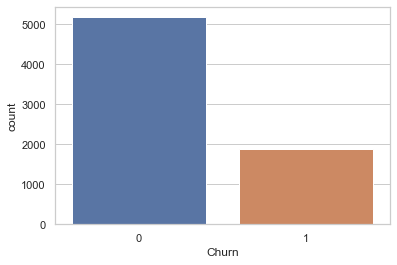

In [51]:
sns.set_style("whitegrid")
sns.countplot(x="Churn", data=df)

In [52]:
from imblearn.over_sampling import BorderlineSMOTE
x_rus, y_rus =BorderlineSMOTE().fit_resample(x, y)
print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

original  Target dataset shape: (7043,)
Resample Target dataset shape (10348,)


<AxesSubplot:xlabel='Churn', ylabel='count'>

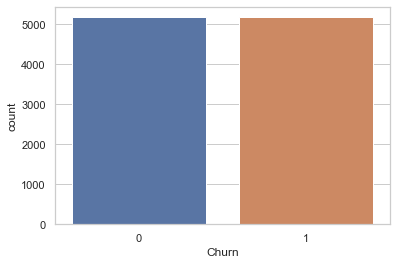

In [53]:
sns.set_style("whitegrid")
sns.countplot(y_rus)

- Now we have balanced data for model training

## Spliting Train and Test data

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=.27,random_state=42)

In [56]:
x_train.shape

(7554, 19)

In [57]:
x_test.shape

(2794, 19)

In [58]:
y_train.shape

(7554,)

In [59]:
y_test.shape

(2794,)

 # MODEL BUILDING:

In [60]:
#Importing necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

### LogisticRegression

In [61]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))


cross validation score: 0.7512556417135399


In [62]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.7594846098783107
[[1024  396]
 [ 276 1098]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.75      1420
           1       0.73      0.80      0.77      1374

    accuracy                           0.76      2794
   macro avg       0.76      0.76      0.76      2794
weighted avg       0.76      0.76      0.76      2794

Training accuracy:: 0.750198570293884
Test accuracy:: 0.7594846098783107


## DECISION TREE CLASSIFIER

In [63]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))


cross validation score for svm: 0.7827693837952941


In [64]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.7877594846098783
[[1103  317]
 [ 276 1098]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1420
           1       0.78      0.80      0.79      1374

    accuracy                           0.79      2794
   macro avg       0.79      0.79      0.79      2794
weighted avg       0.79      0.79      0.79      2794

Training accuracy:: 0.9989409584326184
Test accuracy:: 0.7877594846098783


## KNeighborsClassifier

In [65]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))


cross validation score for knn: 0.7874991535970375


In [66]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.788117394416607
[[ 941  479]
 [ 113 1261]]
              precision    recall  f1-score   support

           0       0.89      0.66      0.76      1420
           1       0.72      0.92      0.81      1374

    accuracy                           0.79      2794
   macro avg       0.81      0.79      0.79      2794
weighted avg       0.81      0.79      0.78      2794

Training accuracy:: 0.8418056658723855
Test accuracy:: 0.788117394416607


## RandomForestClassifier

In [67]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))


cross validation score for rfc: 0.8531216041729419


In [68]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.8575518969219756
[[1199  221]
 [ 177 1197]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1420
           1       0.84      0.87      0.86      1374

    accuracy                           0.86      2794
   macro avg       0.86      0.86      0.86      2794
weighted avg       0.86      0.86      0.86      2794

Training accuracy:: 0.9989409584326184
Test accuracy:: 0.8575518969219756


# ENSEMBLE TECHNIQUES

## 1.ADA BOOST CLASSIFIER

In [69]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))


cross validation score for Ada boost: 0.8068293480596903


In [70]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))


0.8246241947029349
[[1110  310]
 [ 180 1194]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1420
           1       0.79      0.87      0.83      1374

    accuracy                           0.82      2794
   macro avg       0.83      0.83      0.82      2794
weighted avg       0.83      0.82      0.82      2794

Training accuracy:: 0.8153296266878475
Test accuracy:: 0.8246241947029349


## 2.BAGGING CLASSIFIER


In [71]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))


cross validation score for BAGGING Classifier: 0.8321539165942496


In [72]:

bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))


0.8378668575518969
[[1221  199]
 [ 254 1120]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1420
           1       0.85      0.82      0.83      1374

    accuracy                           0.84      2794
   macro avg       0.84      0.84      0.84      2794
weighted avg       0.84      0.84      0.84      2794

Training accuracy:: 0.9900714853057982
Test accuracy:: 0.8378668575518969


## 3.Gradient Boosting classifier


In [73]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score :",np.mean(grbc_score))

cross validation score : 0.8298316186845327


In [ ]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))


#### OBSERVATION:
We will Choose ADA BOOST CLASSIFIER as final model for HYPER PARAMETER TUNING because both train and test accuracies are pretty close and highest as well

# HYPER PARAMETER TUNING:

In [75]:
adb=AdaBoostClassifier()
param_grid={
    'algorithm' : ['SAMME.R'],
    'n_estimators':[50,200,10],
    'learning_rate':[0.1,0.5,1.0],
     'random_state':[10]              
}

In [76]:
adb_grid=GridSearchCV(AdaBoostClassifier(),param_grid,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)

In [77]:
adb_grid.fit(x_train,y_train)
adb_pred=adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,adb_pred))

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.2min finished


Accuracy after parameter tuning:: 0.8335719398711525


In [78]:
adb_grid.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 1.0,
 'n_estimators': 200,
 'random_state': 10}

#### Model training with best parameters

In [79]:
best_param={
    'algorithm' : ['SAMME.R'],
    'n_estimators':[200],
    'learning_rate':[1.0],
     'random_state':[10]    }  

In [80]:
best_adb_grid=GridSearchCV(AdaBoostClassifier(),best_param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)

In [81]:
best_adb_grid.fit(x_train,y_train)
best_adb_pred=best_adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_adb_pred))

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   12.0s finished


Accuracy after parameter tuning:: 0.8335719398711525


#### HYPER PARAMETER TUNING models accuracy score got increased 


## Report of AdaBoostClassifier

In [82]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_adb_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      1420
           1       0.81      0.86      0.84      1374

    accuracy                           0.83      2794
   macro avg       0.83      0.83      0.83      2794
weighted avg       0.83      0.83      0.83      2794



<AxesSubplot:>

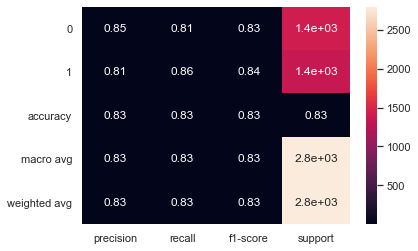

In [83]:
clsf_repo = classification_report(y_test,best_adb_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [84]:
from sklearn.metrics import roc_auc_score

In [85]:
print("roc auc score::",roc_auc_score(y_test, best_adb_pred))

roc auc score:: 0.8339453020890993


In [86]:
from sklearn.metrics import roc_curve

In [87]:
fpr1, tpr1, thresh1 = roc_curve(y_test, best_adb_pred, pos_label=1)

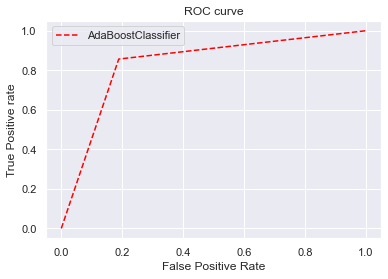

In [88]:
#plotting ROC CURVE
sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='AdaBoostClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# Saving Model:

In [89]:
import joblib

In [90]:
joblib.dump(best_adb_grid.best_estimator_,'CustomerChurnAnalysis.pkl')

['CustomerChurnAnalysis.pkl']